In [58]:
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
data=pd.read_csv('/content/amzon review data.csv', encoding='cp1252')
data=data.iloc[:,0:15]
data.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,31-08-2015
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,31-08-2015
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,31-08-2015
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,31-08-2015
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,31-08-2015
5,US,13394189,R3BPETL222LMIM,B009B7F6CA,873028700,Melissa & Doug Water Wow Coloring Book - Vehicles,Toys,5,0,0,N,Y,Five Stars,Great item. Pictures pop thru and add detail a...,31-08-2015
6,US,2749569,R3SORMPJZO3F2J,B0101EHRSM,723424342,Big Bang Cosmic Pegasus (Pegasis) Metal 4D Hig...,Toys,3,2,2,N,Y,Three Stars,"To keep together, had to use crazy glue.",31-08-2015
7,US,41137196,R2RDOJQ0WBZCF6,B00407S11Y,383363775,Fun Express Insect Finger Puppets 12ct Toy,Toys,5,0,0,N,Y,Five Stars,I was pleased with the product.,31-08-2015
8,US,433677,R2B8VBEPB4YEZ7,B00FGPU7U2,780517568,Fisher-Price Octonauts Shellington's On-The-Go...,Toys,5,0,0,N,Y,Five Stars,Children like it,31-08-2015
9,US,1297934,R1CB783I7B0U52,B0013OY0S0,269360126,Claw Climber Goliath/ Disney's Gargoyles,Toys,1,0,1,N,Y,Shame on the seller !!!,Showed up not how it's shown . Was someone's o...,31-08-2015


**Number Of words**

In [60]:
#Number of Words in single review
data['word_count'] = data['review_body'].apply(lambda x: len(str(x).split(" ")))
data[['review_body','word_count']].head()

,review_body,word_count
0,Excellent!!!,1
1,Great quality wooden track (better than some o...,45
2,Cards are not as big as pictured.,7
3,my daughter loved it and i liked the price and...,31
4,Do not buy these! They break very fast I spun ...,49


**Number Of Char**

In [61]:
#Number of characters in single review including spaces
data['char_count'] = data['review_body'].str.len() 
data[['review_body','char_count']].head()

,review_body,char_count
0,Excellent!!!,12
1,Great quality wooden track (better than some o...,265
2,Cards are not as big as pictured.,33
3,my daughter loved it and i liked the price and...,145
4,Do not buy these! They break very fast I spun ...,241


**Number of Stopwords**

In [62]:
stop = stopwords.words('english')

data['stopwords'] = data['review_body'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['review_body','stopwords']].head()

,review_body,stopwords
0,Excellent!!!,0
1,Great quality wooden track (better than some o...,17
2,Cards are not as big as pictured.,4
3,my daughter loved it and i liked the price and...,16
4,Do not buy these! They break very fast I spun ...,21


In [63]:
# Total no.of stopwords in reviews
data['stopwords'].sum()

584

**Data Pre-Processing**

Converting to lower case

In [64]:
data['review_body'] = data['review_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review_body'].head()

0                                         excellent!!!
1    great quality wooden track (better than some o...
2                    cards are not as big as pictured.
3    my daughter loved it and i liked the price and...
4    do not buy these! they break very fast i spun ...
Name: review_body, dtype: object

Removing Punctuation and Special Characters

In [65]:
data['review_body'] = data['review_body'].str.replace('[^\w\s]','')
data['review_body'].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                                            excellent
1    great quality wooden track better than some ot...
2                     cards are not as big as pictured
3    my daughter loved it and i liked the price and...
4    do not buy these they break very fast i spun t...
Name: review_body, dtype: object

Removing of Stop Words

In [66]:
stop = stopwords.words('english')
data['review_body'] = data['review_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review_body'].head()

0                                            excellent
1    great quality wooden track better others tried...
2                                   cards big pictured
3    daughter loved liked price came rather shoppin...
4    buy break fast spun 15 minutes end flew dont w...
Name: review_body, dtype: object

**Tokenization**

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
review=np.array(data['review_body'])
s=str(review)
s

"['excellent'\n 'great quality wooden track better others tried perfect match various vintages thomas track already enough track fun get creative incorporating key pieces track splits loops bends'\n 'cards big pictured'\n 'daughter loved liked price came rather shopping ton people around amazon best way shop'\n 'buy break fast spun 15 minutes end flew dont waste money made cheap plastic cracks buy poi balls work lot better limited funds'\n 'great item pictures pop thru add detail 34painted34 pictures dry repainted'\n 'keep together use crazy glue' 'pleased product' 'children like'\n 'showed shown someones old toy paint'\n 'really liked little larger thought still fun'\n 'nice huge balloon local grocery store fill small fee totally worth'\n 'great deal' 'advertised'\n 'comes w 15 servo expect spend 150 good servo immediately stock one breaks right away'\n 'awesome thanks'\n 'got item son play around closest relevance items like army trained camera rc bots thing awesome tested range got 

In [69]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'excellent'", "'great", 'quality', 'wooden', 'track', 'better', 'others', 'tried', 'perfect', 'match', 'various', 'vintages', 'thomas', 'track', 'already', 'enough', 'track', 'fun', 'get', 'creative', 'incorporating', 'key', 'pieces', 'track', 'splits', 'loops', "bends'", "'cards", 'big', "pictured'", "'daughter", 'loved', 'liked', 'price', 'came', 'rather', 'shopping', 'ton', 'people', 'around', 'amazon', 'best', 'way', "shop'", "'buy", 'break', 'fast', 'spun', '15', 'minutes', 'end', 'flew', 'dont', 'waste', 'money', 'made', 'cheap', 'plastic', 'cracks', 'buy', 'poi', 'balls', 'work', 'lot', 'better', 'limited', "funds'", "'great", 'item', 'pictures', 'pop', 'thru', 'add', 'detail', '34painted34', 'pictures', 'dry', "repainted'", "'keep", 'together', 'use', 'crazy', 'glue', "'", "'pleased", 'product', "'", "'children", "like'", "'showed", 'shown', 'someones', 'old', 'toy', "paint'", "'really", 'liked', 'little', 'larger', 'thought', 'still', "fun'", "'nice", 'huge', 'balloon',

**Stemming**

In [70]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['review_body'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                                excel
1    great qualiti wooden track better other tri pe...
2                                      card big pictur
3    daughter love like price came rather shop ton ...
4    buy break fast spun 15 minut end flew dont was...
Name: review_body, dtype: object

**Lemmatization**

In [71]:
from textblob import Word

In [72]:
data['review_body'] = data['review_body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review_body'].head()

0                                            excellent
1    great quality wooden track better others tried...
2                                    card big pictured
3    daughter loved liked price came rather shoppin...
4    buy break fast spun 15 minute end flew dont wa...
Name: review_body, dtype: object

**Sentiment Analysis**

Sentiment Polarity

In [73]:
data['sentiment_polarity'] = data['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['review_body','sentiment_polarity']].head()

,review_body,sentiment_polarity
0,excellent,1.000000
1,great quality wooden track better others tried...,0.344444
2,card big pictured,0.000000
3,daughter loved liked price came rather shoppin...,0.766667
4,buy break fast spun 15 minute end flew dont wa...,0.165714


Sentiment

In [74]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['review_body','sentiment','sentiment_polarity']]

,review_body,sentiment,sentiment_polarity
0,excellent,Positive,1.000000e+00
1,great quality wooden track better others tried...,Positive,3.444444e-01
2,card big pictured,Neutral,0.000000e+00
3,daughter loved liked price came rather shoppin...,Positive,7.666667e-01
4,buy break fast spun 15 minute end flew dont wa...,Positive,1.657143e-01
5,great item picture pop thru add detail 34paint...,Positive,3.666667e-01
6,keep together use crazy glue,Negative,-6.000000e-01
7,pleased product,Positive,5.000000e-01
8,child like,Neutral,0.000000e+00
9,showed shown someone old toy paint,Positive,1.000000e-01


In [75]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [76]:
count=data['sentiment'].value_counts()
count

Positive    40
Neutral      5
Negative     4
Name: sentiment, dtype: int64

In [77]:
data

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,word_count,char_count,stopwords,sentiment_polarity,sentiment
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,excellent,31-08-2015,1,12,0,1.000000e+00,Positive
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,great quality wooden track better others tried...,31-08-2015,45,265,17,3.444444e-01,Positive
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,card big pictured,31-08-2015,7,33,4,0.000000e+00,Neutral
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,daughter loved liked price came rather shoppin...,31-08-2015,31,145,16,7.666667e-01,Positive
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,buy break fast spun 15 minute end flew dont wa...,31-08-2015,49,241,21,1.657143e-01,Positive
5,US,13394189,R3BPETL222LMIM,B009B7F6CA,873028700,Melissa & Doug Water Wow Coloring Book - Vehicles,Toys,5,0,0,N,Y,Five Stars,great item picture pop thru add detail 34paint...,31-08-2015,18,105,6,3.666667e-01,Positive
6,US,2749569,R3SORMPJZO3F2J,B0101EHRSM,723424342,Big Bang Cosmic Pegasus (Pegasis) Metal 4D Hig...,Toys,3,2,2,N,Y,Three Stars,keep together use crazy glue,31-08-2015,9,41,2,-6.000000e-01,Negative
7,US,41137196,R2RDOJQ0WBZCF6,B00407S11Y,383363775,Fun Express Insect Finger Puppets 12ct Toy,Toys,5,0,0,N,Y,Five Stars,pleased product,31-08-2015,6,31,3,5.000000e-01,Positive
8,US,433677,R2B8VBEPB4YEZ7,B00FGPU7U2,780517568,Fisher-Price Octonauts Shellington's On-The-Go...,Toys,5,0,0,N,Y,Five Stars,child like,31-08-2015,3,16,1,0.000000e+00,Neutral
9,US,1297934,R1CB783I7B0U52,B0013OY0S0,269360126,Claw Climber Goliath/ Disney's Gargoyles,Toys,1,0,1,N,Y,Shame on the seller !!!,showed shown someone old toy paint,31-08-2015,15,71,6,1.000000e-01,Positive


**Visualizations**

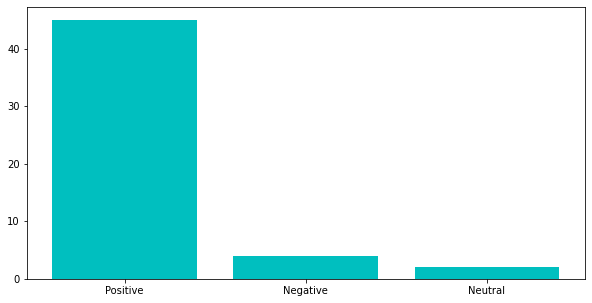

In [78]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[45,4,2]
senti=['Positive','Negative','Neutral']
plt.bar(senti,count,color='c');

In [79]:
# Joining the list into one string/text
text = ' '.join(data['review_body'])
text

'excellent great quality wooden track better others tried perfect match various vintage thomas track already enough track fun get creative incorporating key piece track split loop bend card big pictured daughter loved liked price came rather shopping ton people around amazon best way shop buy break fast spun 15 minute end flew dont waste money made cheap plastic crack buy poi ball work lot better limited fund great item picture pop thru add detail 34painted34 picture dry repainted keep together use crazy glue pleased product child like showed shown someone old toy paint really liked little larger thought still fun nice huge balloon local grocery store fill small fee totally worth great deal advertised come w 15 servo expect spend 150 good servo immediately stock one break right away awesome thanks got item son play around closest relevance item like army trained camera rc bot thing awesome tested range got somewhere close 50 yard without issue getting control bit tricky first twenty mi

**Word Cloud for our reviews**

In [80]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

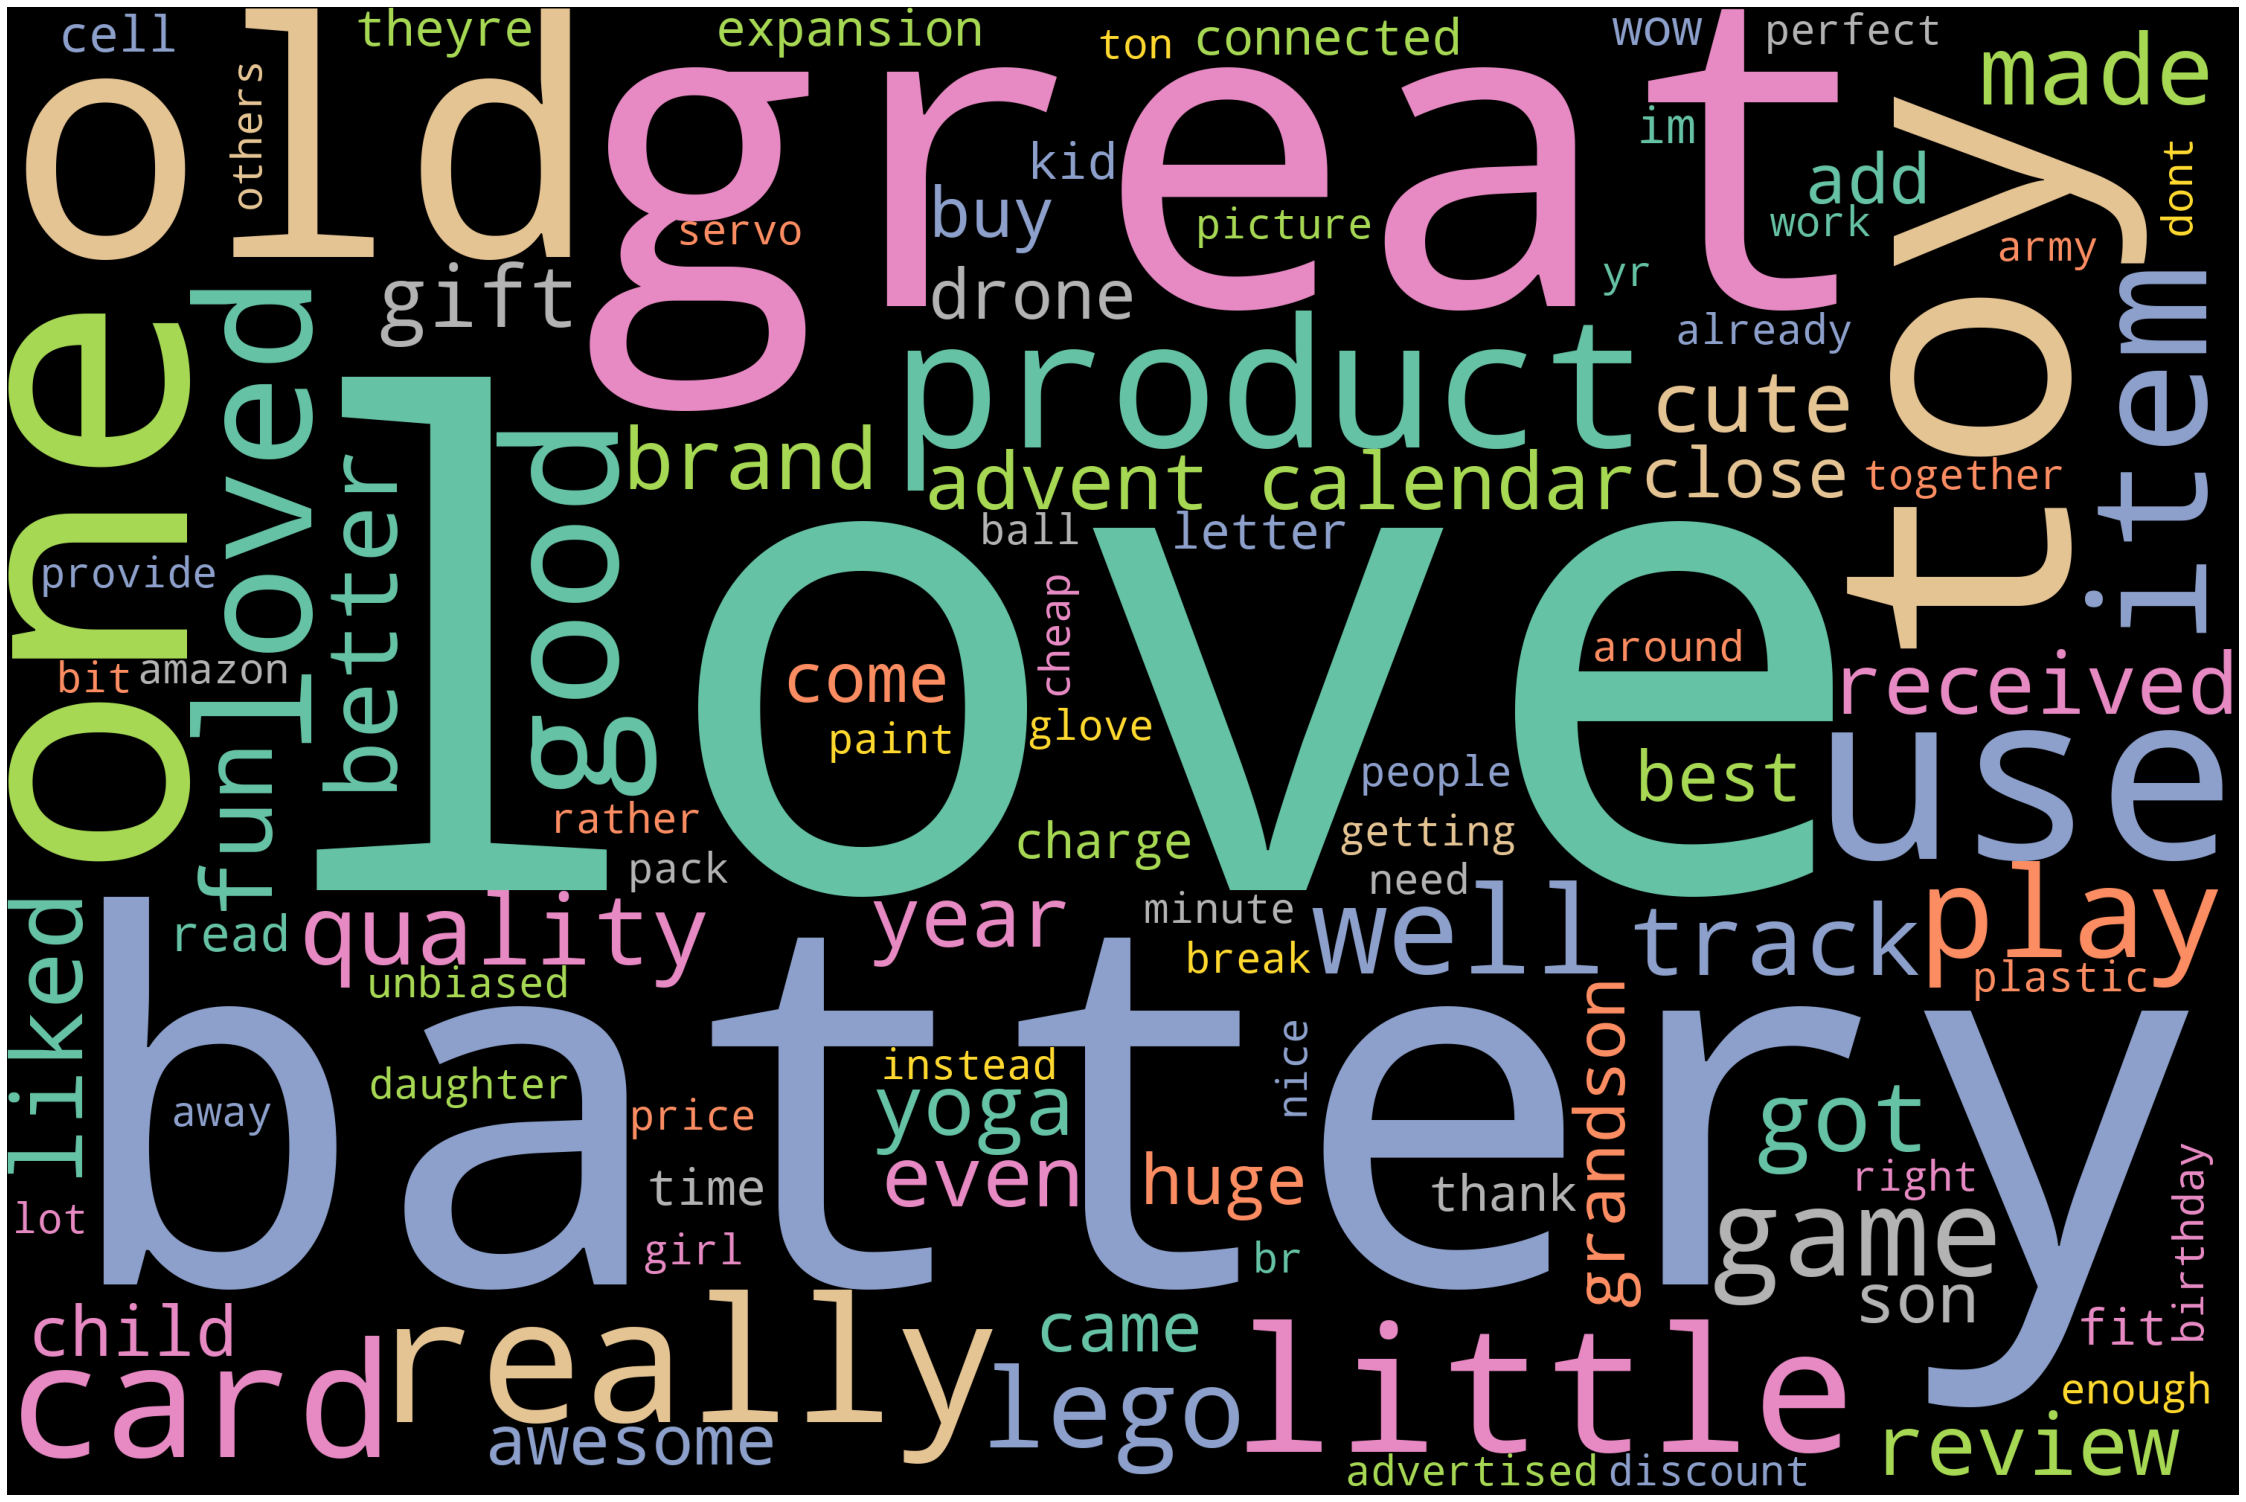

In [81]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)
